<a href="https://colab.research.google.com/github/devsuvendu/Netflix-Movies-and-TV-Shows-Clustering/blob/main/NoteBook_of_Netflix_and_TV_Shows_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

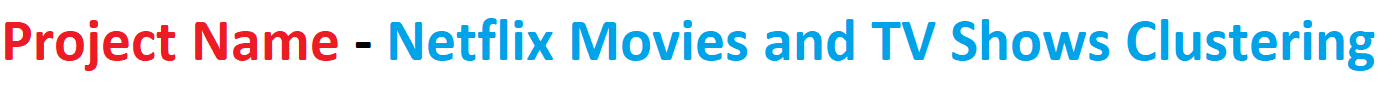

**Project Type** - Unsupervised Machine Learning

**Contribution** - Team

**Team Member 1** - Abhishek kumar

**Team Member 2** - Suvendu Dey

**Team Member 3** - Ranjit Biswal

# **Project Summary** -

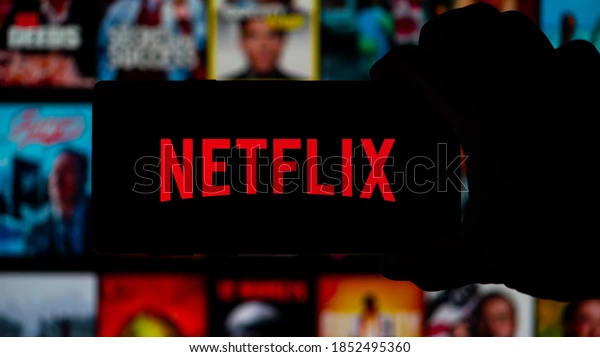

# **Github Link** -

**1. Suvendu Dey** - https://github.com/devsuvendu/Netflix-Movies-and-TV-Shows-Clustering

**2. Abhishek Kumar** -

**3. Ranjit Biswal** -

# **Problem Statement**

*This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.*

*In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.*

*Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.*

# **Dataset Description** -

**1. show_id :** Unique ID for every Movie / Tv Show

**2. type :** Identifier - A Movie or TV Show

**3. title :** Title of the Movie / Tv Show

**4. director :** Director of the Movie

**5. cast :** Actors involved in the movie / show

**6. country :** Country where the movie / show was produced

**7. date_added :** Date it was added on Netflix

**8. release_year :** Actual Releaseyear of the movie / show

**9. rating :** TV Rating of the movie / show

**10. duration :** Total Duration - in minutes or number of seasons

**11. listed_in :** Genere

**12. description:** The Summary description

#### **Define Your Business Objective?**

1. Exploratory Data Analysis.

2. Understanding what type content is available in different countries.

3. Is Netflix has increasingly focusing on TV rather than movies in recent years.

4. Clustering similar content by matching text-based features.

# ***Let's Begin !***

First of all, import all required libraries like pandas, matplotlib, etc. These libraries are used to load, preprocess and visualize the dataset.

Then load the training and testing dataset using the read_csv function of the pandas module and store into the separate variable train and test.

## ***1. Know Your Data***

### Import Libraries

In [88]:
# Import Libraries

import numpy as np
import pandas as pd
from numpy import math
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from matplotlib.pyplot import figure
import plotly.graph_objects as go
import plotly.offline as py
import plotly.express as px
from datetime import datetime

from wordcloud import WordCloud, STOPWORDS


from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

import warnings
warnings.filterwarnings('ignore')

In [33]:
# Connect To Google Drive
from google.colab import drive
drive.mount('/content/Drive/') # suvendu drive connect
#drive.mount('/content/drive/') # AD drive connect
#drive.mount('/content/DRIVE/') # Ranjit drive

Drive already mounted at /content/Drive/; to attempt to forcibly remount, call drive.mount("/content/Drive/", force_remount=True).


### Dataset Loading

In [34]:
#loading data using exception handling

try:
  # Load Dataset
  file_path= '/content/Drive/MyDrive/CapstoneProject/NETFLIX_MOVIES_AND_TV_SHOWS_CLUSTERING.CSV' # suvendu path
# file_path= '/content/drive/MyDrive/AlmaBetter/CapstoneProject/NETFLIX_MOVIES_AND_TV_SHOWS_CLUSTERING.CSV' #AD File path
# file_path='/content/DRIVE/MyDrive/Capstone Project/NETFLIX_MOVIES_AND_TV_SHOWS_CLUSTERING.CSV' #ranjit file path
  Dataset=pd.read_csv(file_path)
except FileNotFoundError:
  print('Please provide correct file path for csv data')

### Dataset First View

In [35]:
# Dataset First Look
Dataset.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


### Dataset last View

In [36]:
# Dataset Last Look
Dataset.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...
7786,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,NaN,"United Kingdom, Canada, United States","March 1, 2020",2019,TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...


### Dataset Rows & Columns count

In [37]:
# Dataset Rows & Columns count
Dataset.shape

(7787, 12)

### Dataset Information

In [38]:
# Dataset Info
Dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


#### Duplicate Values

In [39]:
# Dataset Duplicate Value Count
Dataset[Dataset.duplicated()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description


In that dataset there is no duplicated values are there.

#### Missing Values/Null Values

In [40]:
# Missing Values/Null Values Count
print(Dataset.isnull().sum())

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64


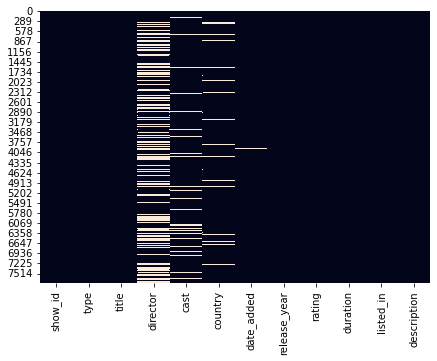

In [41]:
# Visualizing the missing values
# Checking Null Value by plotting Heatmap
plt.figure(figsize=(7,5))
sns.heatmap(Dataset.isnull(), cbar=False)
plt.show()

### What did you know about your dataset?

In that dataset this column null value there 1. director=2389,cast    =718,country=507,date_added=10.

## ***2. Understanding Your Variables***

In [42]:
# Dataset Columns
Dataset.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [43]:
# Dataset Describe
Dataset.describe(include='all')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,7787,7787,7787,5398,7069,7280,7777,7787.000000,7780,7787,7787,7787
unique,7787,2,7787,4049,6831,681,1565,NaN,14,216,492,7769
top,s1,Movie,3%,"Raúl Campos, Jan Suter",David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,Documentaries,Multiple women report their husbands as missin...
freq,1,5377,1,18,18,2555,118,NaN,2863,1608,334,3
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.932580,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.757395,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018.000000,NaN,NaN,NaN,NaN


### Variables Description

Answer here

### Check Unique Values for each variable.

In [44]:
# Check Unique Values for each variable.
for i in Dataset.columns.tolist():
  print("No. of unique values in ",i,"is",Dataset[i].nunique(),".")

No. of unique values in  show_id is 7787 .
No. of unique values in  type is 2 .
No. of unique values in  title is 7787 .
No. of unique values in  director is 4049 .
No. of unique values in  cast is 6831 .
No. of unique values in  country is 681 .
No. of unique values in  date_added is 1565 .
No. of unique values in  release_year is 73 .
No. of unique values in  rating is 14 .
No. of unique values in  duration is 216 .
No. of unique values in  listed_in is 492 .
No. of unique values in  description is 7769 .


In [45]:
#total null values
Dataset.isnull().sum().sum()

3631

### **Handling Null Values:-**

In [46]:
# Write your code to make your dataset analysis ready.

#Handling Null Values
Dataset['cast'].fillna(value='No cast',inplace=True)
Dataset['country'].fillna(value=Dataset['country'].mode()[0],inplace=True)

In [47]:
#'date_added' and 'rating' contains an insignificant portion of the data so we will drop them from the dataset
Dataset.dropna(subset=['date_added','rating'],inplace=True)

In [48]:
#Dropping Director Column
Dataset.drop(['director'],axis=1,inplace=True)

In [49]:
#again checking is there any null values are not
Dataset.isnull().sum()

show_id         0
type            0
title           0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [50]:
# Dataset Rows & Columns count
Dataset.shape

(7770, 11)

### What all manipulations have you done and insights you found?

## 3. ***Data Wrangling***

### Data Wrangling Code

In [69]:

# Write your code to make your dataset analysis ready.

# Create a copy of the current dataset and assigning to df
df=Dataset.copy()

In [70]:
# Top countries
df.country.value_counts()

United States     3379
India              956
United Kingdom     576
Canada             259
Japan              235
                  ... 
Zimbabwe             1
Namibia              1
Soviet Union         1
Iran                 1
Somalia              1
Name: country, Length: 81, dtype: int64

In [71]:
# Genre of shows
df.listed_in.value_counts()

Dramas                          1383
Comedies                        1074
Documentaries                    751
Action & Adventure               721
International TV Shows           689
Children & Family Movies         502
Crime TV Shows                   369
Kids' TV                         356
Stand-Up Comedy                  321
Horror Movies                    244
British TV Shows                 231
Docuseries                       193
Anime Series                     146
International Movies             114
TV Comedies                      109
Reality TV                       102
Classic Movies                    77
TV Dramas                         62
Movies                            52
Thrillers                         49
TV Action & Adventure             36
Stand-Up Comedy & Talk Shows      33
Romantic TV Shows                 28
Independent Movies                20
Anime Features                    19
Classic & Cult TV                 19
Music & Musicals                  17
T

In [72]:
# Choosing the primary country and primary genre to simplify the analysis
df['country'] = df['country'].apply(lambda x: x.split(',')[0])
df['listed_in'] = df['listed_in'].apply(lambda x: x.split(',')[0])

In [73]:
# contry in which a movie was produced
df.country.value_counts()

United States     3379
India              956
United Kingdom     576
Canada             259
Japan              235
                  ... 
Zimbabwe             1
Namibia              1
Soviet Union         1
Iran                 1
Somalia              1
Name: country, Length: 81, dtype: int64

In [74]:
# genre of shows
df.listed_in.value_counts()

Dramas                          1383
Comedies                        1074
Documentaries                    751
Action & Adventure               721
International TV Shows           689
Children & Family Movies         502
Crime TV Shows                   369
Kids' TV                         356
Stand-Up Comedy                  321
Horror Movies                    244
British TV Shows                 231
Docuseries                       193
Anime Series                     146
International Movies             114
TV Comedies                      109
Reality TV                       102
Classic Movies                    77
TV Dramas                         62
Movies                            52
Thrillers                         49
TV Action & Adventure             36
Stand-Up Comedy & Talk Shows      33
Romantic TV Shows                 28
Independent Movies                20
Anime Features                    19
Classic & Cult TV                 19
Music & Musicals                  17
T

In [78]:
# Number of seasons for tv shows
df[df['type']=='TV Show'].duration.value_counts()

1     1606
2      378
3      183
4       86
5       57
6       30
7       19
8       18
9        8
10       5
11       2
12       2
15       2
13       1
16       1
Name: duration, dtype: int64

In [80]:
# Movie length in minutes
df[df['type']=='Movie'].duration.unique()

array([ 93,  78,  80, 123,  95, 119, 118, 143, 103,  89,  91, 149, 144,
       124,  87, 110, 128, 117, 100,  84,  99,  90, 102, 104, 105,  56,
       125,  81,  97, 106, 107, 109,  44,  75, 101, 113, 114, 130,  94,
       140, 135,  82,  70, 121,  92, 164,  53,  83, 116,  86, 120,  96,
       126, 129,  77, 137, 148,  28, 122, 176,  85,  22,  68, 111,  29,
       142, 168,  21,  59,  20,  98, 108,  76,  26, 156,  30,  57, 150,
       133, 115, 154, 127, 146, 136,  88, 131,  24, 112,  74,  63,  38,
        25, 174,  60, 153, 158, 151, 162,  54,  51,  69,  64, 147,  42,
        79,  40,  45, 172,  10, 163,  55,  72,  61,  71, 160, 171,  48,
       139, 157,  15,  65, 134, 161,  62, 186,  49,  73,  58, 165, 166,
       138, 159, 141, 132,  52,  67,  34,  66, 312, 180,  47, 155,  14,
       177,  11,   9,  46, 145,   8,  12,  43,  50,  23, 185, 200, 169,
        27, 170, 196,  33, 181, 204,  32,  35, 167, 179, 193,  13, 214,
        17, 173, 192, 209, 187,  41, 182, 224,  37, 233, 189, 15

In [82]:
# Dataset Info
Dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7770 entries, 0 to 7786
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7770 non-null   object
 1   type          7770 non-null   object
 2   title         7770 non-null   object
 3   cast          7770 non-null   object
 4   country       7770 non-null   object
 5   date_added    7770 non-null   object
 6   release_year  7770 non-null   int64 
 7   rating        7770 non-null   object
 8   duration      7770 non-null   int64 
 9   listed_in     7770 non-null   object
 10  description   7770 non-null   object
dtypes: int64(2), object(9)
memory usage: 728.4+ KB


## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

# **Chart-1** 

Text(0.5, 1.0, 'Movies and TV Shows in the dataset')

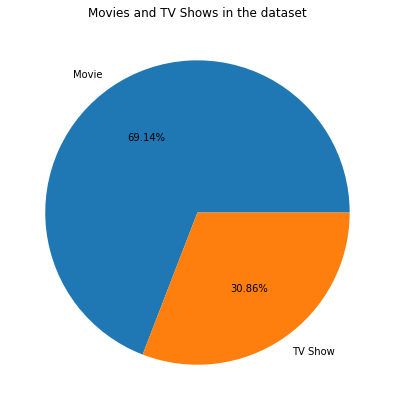

In [56]:
# Number of Movies and TV Shows in the dataset
plt.figure(figsize=(7,7))
Dataset.type.value_counts().plot(kind='pie',autopct='%1.2f%%')
plt.ylabel('')
plt.title('Movies and TV Shows in the dataset')

# **Chart-2** 

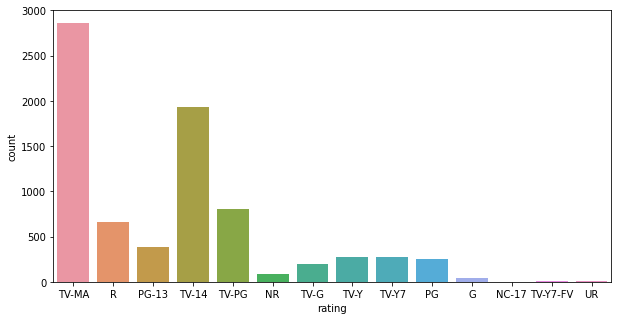

In [83]:
# Age ratings for shows in the dataset
plt.figure(figsize=(10,5))
sns.countplot(x='rating',data=df)

In [84]:
# Changing the values in the rating column
rating_map = {'TV-MA':'Adults',
              'R':'Adults',
              'PG-13':'Teens',
              'TV-14':'Young Adults',
              'TV-PG':'Older Kids',
              'NR':'Adults',
              'TV-G':'Kids',
              'TV-Y':'Kids',
              'TV-Y7':'Older Kids',
              'PG':'Older Kids',
              'G':'Kids',
              'NC-17':'Adults',
              'TV-Y7-FV':'Older Kids',
              'UR':'Adults'}

df['rating'].replace(rating_map, inplace = True)
df['rating'].unique()

array(['Adults', 'Teens', 'Young Adults', 'Older Kids', 'Kids'],
      dtype=object)

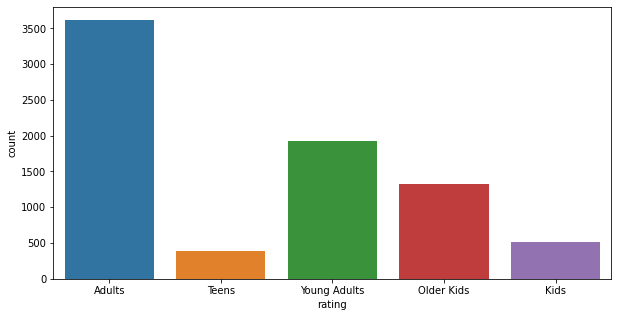

In [85]:
# Age ratings for shows in the dataset
plt.figure(figsize=(10,5))
sns.countplot(x='rating',data=df)

# **Chart-3**

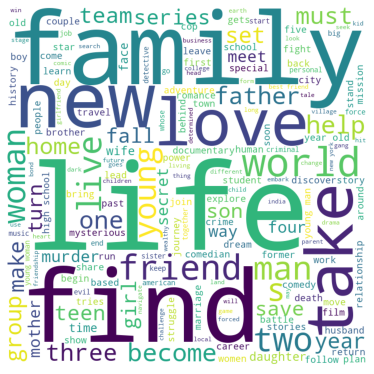

In [87]:
# Building a wordcloud for the movie descriptions
comment_words = ''
stopwords = set(STOPWORDS)

# iterate through the csv file
for val in df.description.values:
    
    # typecaste each val to string
    val = str(val)

    # split the value
    tokens = val.split()
    
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
    
    comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 700, height = 700,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)


# plot the WordCloud image                      
plt.figure(figsize = (10,5), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)